<a href="https://colab.research.google.com/github/MohammadNPak/MFTDjango04/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape,y_train.shape)


170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)


In [22]:

from keras.layers import (Conv2D,
                          BatchNormalization,
                          MaxPool2D,
                          Dropout,Flatten,Dense)
from keras.models import Sequential

model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')  
])

metrics = [
    tf.keras.metrics.Precision(),
    tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.Recall()
]
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=metrics)


In [23]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y_train,10)
print(y_new.shape)

(50000, 10)


In [42]:
x = x_train/255

report=model.fit(x=x,
    y=y_new,
    batch_size=64,
    epochs=50,
    validation_split=0.15,
    shuffle=True)
model.save('m1.md5')

Epoch 1/50
665/665 [==============================] - 191s 287ms/step - loss: 2.0934 - precision_2: 0.3826 - categorical_accuracy: 0.2169 - recall_2: 0.0052 - val_loss: 2.1803 - val_precision_2: 0.0000e+00 - val_categorical_accuracy: 0.1804 - val_recall_2: 0.0000e+00
Epoch 2/50
665/665 [==============================] - 190s 286ms/step - loss: 1.9947 - precision_2: 0.5203 - categorical_accuracy: 0.2572 - recall_2: 0.0133 - val_loss: 2.0592 - val_precision_2: 0.7727 - val_categorical_accuracy: 0.2439 - val_recall_2: 0.0023
Epoch 3/50
665/665 [==============================] - 190s 285ms/step - loss: 1.9086 - precision_2: 0.5629 - categorical_accuracy: 0.2883 - recall_2: 0.0279 - val_loss: 2.0538 - val_precision_2: 0.7778 - val_categorical_accuracy: 0.2376 - val_recall_2: 0.0047
Epoch 4/50
665/665 [==============================] - 189s 285ms/step - loss: 1.8367 - precision_2: 0.5762 - categorical_accuracy: 0.3132 - recall_2: 0.0442 - val_loss: 1.8090 - val_precision_2: 0.5512 - val_cate

dict_keys(['loss', 'precision_2', 'categorical_accuracy', 'recall_2', 'val_loss', 'val_precision_2', 'val_categorical_accuracy', 'val_recall_2'])


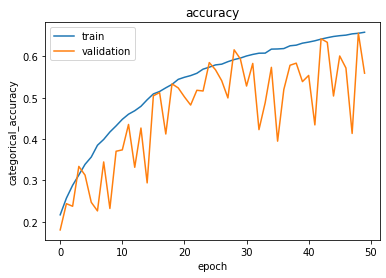

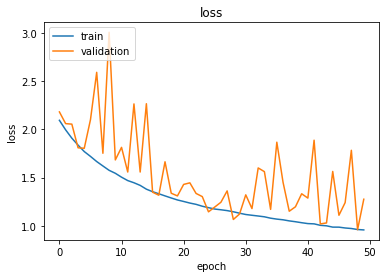

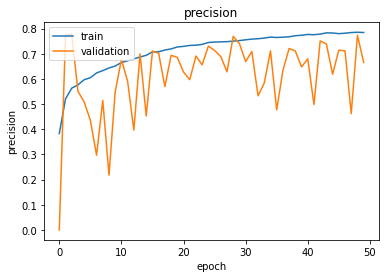

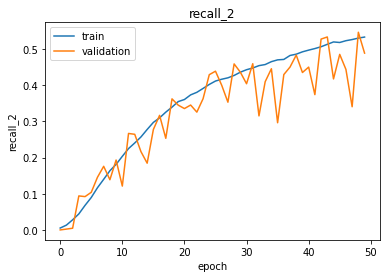

In [43]:
print(report.history.keys())

plt.plot(report.history['categorical_accuracy'])
plt.plot(report.history['val_categorical_accuracy'])
plt.title('accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(report.history['loss'])
plt.plot(report.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(report.history['precision_2'])
plt.plot(report.history['val_precision_2'])
plt.title('precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(report.history['recall_2'])
plt.plot(report.history['val_recall_2'])
plt.title('recall_2')
plt.ylabel('recall_2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

